In [1]:
%matplotlib inline
import openpathsampling as paths
import numpy as np
import matplotlib.pyplot as plt
import os
import openpathsampling.visualize as ops_vis
from IPython.display import SVG

In [2]:
filename = "alanine_dipeptide_tps.nc"
#filename = "saved_AD_tps.nc"

In [3]:
flexible = paths.AnalysisStorage(filename)

In [4]:
print "File size: {0} for {1} steps, {2} snapshots".format(
    flexible.file_size_str,
    len(flexible.steps),
    len(flexible.snapshots)
)

File size: 5.57GB for 1495 steps, 297654 snapshots


In [5]:
flex_scheme = flexible.schemes[0]

In [6]:
flex_scheme.move_summary(flexible)

shooting ran 100.000% (expected 100.00%) of the cycles with acceptance 840/1494 (56.22%)


In [7]:
history = ops_vis.ReplicaHistoryTree(
    storage=flexible,
    steps=flexible.steps[0:50],
    replica=0
)

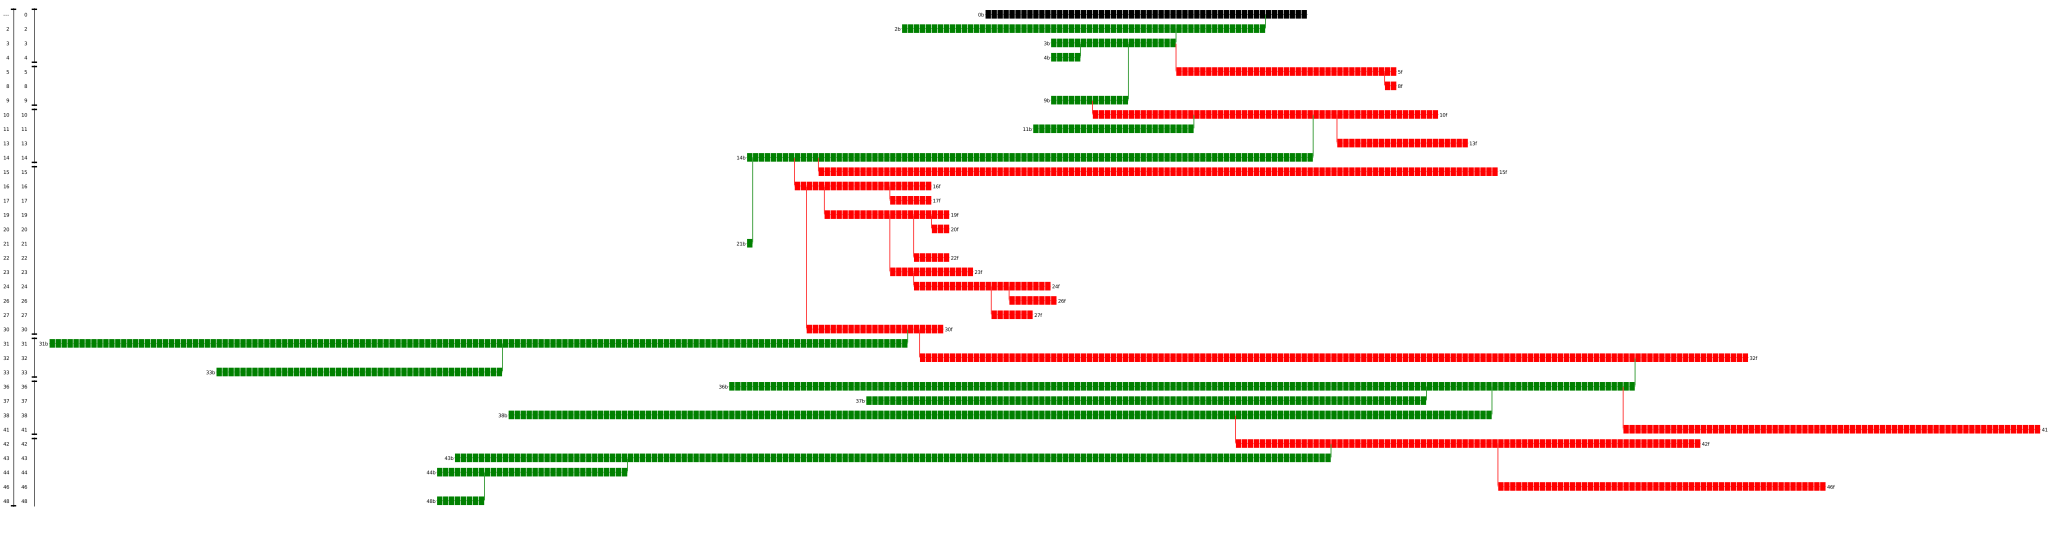

In [8]:
history.view.zoom = 1.0
history.view.scale_y = 24
history.view.scale_x = 10
history.view.font_size = 0.35
history.view.horizontal_gap = 0.05

SVG(history.view.to_svg())

In [10]:
full_history = ops_vis.ReplicaHistoryTree(
    storage=flexible,
    steps=flexible.steps[0:len(flexible.steps)],
    replica=0
)
print "Decorrelated trajectories:", len(full_history.decorrelated_trajectories)

Decorrelated trajectories: 133


Maximum 920 (9200.0fs)


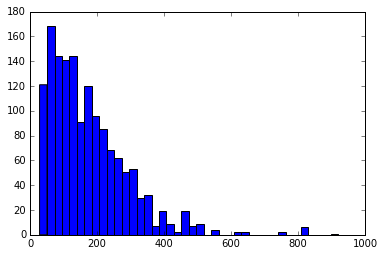

In [23]:
# TODO: path length histogram
path_lengths = [len(step.active[0].trajectory) for step in flexible.steps]
plt.hist(path_lengths, bins=40);
print "Maximum", max(path_lengths), "("+str(max(path_lengths)*1.0*10)+"fs)"

In [14]:
# TODO: path density plots (arbitrary dimension!)

In [15]:
# TODO: "transition state analysis"
# my thought: 
# * pick 100 (decorrelated) trajectories
# * take every 3rd frame (or something like that)
# * run 50 (or 100?) committor shots with randomized initial velocities
# * say something about which points are likely at/near the 50% isocommittor

In [16]:
#import nglview as nv
#nv.show_mdtraj(traj.md())

In [17]:
engine = flexible.engines[0]

In [22]:
print engine.options

{'timestep': None, 'nsteps_per_frame': 10, 'n_frames_max': 1000, 'platform': 'OpenCL'}
